In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'mcdonalds.csv'
df = pd.read_csv(file_path)

# Convert 'Yes'/'No' to 1/0
binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
for col in binary_columns:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

In [3]:
ordinal_mappings = {
    'Like': {'-5': 0, '-4': 1, '-3': 2, '-2': 3, '-1': 4, '0': 5, '1': 6, '2': 7, '3': 8, '4': 9, '5': 10},
    'VisitFrequency': {
        'Never': 0, 'Once a year': 1, 'Every six months': 2, 'Every three months': 3,
        'Once a month': 4, 'Once a week': 5, 'Daily': 6
    }
}
for col, mapping in ordinal_mappings.items():
    df[col] = df[col].map(mapping)

In [4]:
# Encode nominal categorical variables (e.g., 'Gender')
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Standardize the features
features = df.drop(columns=['Age', 'Gender'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [5]:
# Apply KMeans clustering
n_clusters = 4  # You can change the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualize the clusters using PCA for 2D plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


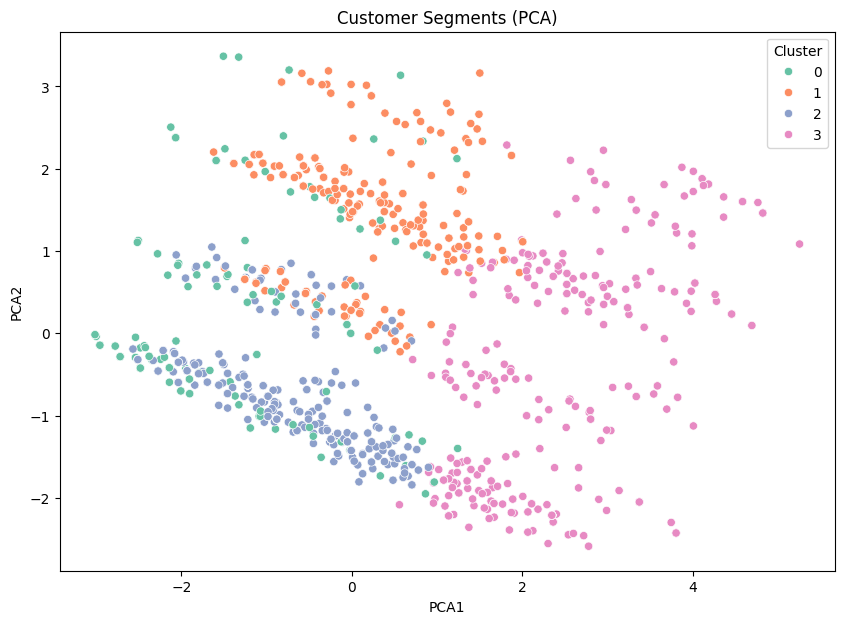

In [6]:
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Segments (PCA)')
plt.show()